Muhammad Amirul Samsul Bahar, Universiti Malaya - WQD7005 Data Mining
# Forecasting WTI Crude Oil Price
------------------------------------
This notebook explains on forecasting WTI crude oil closing price using two machine learning models which are Support Vector Machine (SVM) and Linear Regression.

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

### Step 1: Load the Data
---------------------------
<div align='justify'>
    
In this step, we will load the WTI price dataset as dataframe using pandas' `read_csv()` method and have a glimpse on how the data looks like. Some of the methods that we will be using a lot in the first few steps are:
* `DataFrame.info()`
* `DataFrame.head()`
* `DataFrame.tail()`

The data is scrapped from a website called <a href="https://markets.businessinsider.com/">Markets Insider</a>.

#### Read dataset from github as Pandas DataFrame
    
</div>

In [2]:
# Get the data from github
github_link = 'https://raw.githubusercontent.com/muhdamirulsamsul/DataMining/master/wtiprice.csv'
df = pd.read_csv(github_link)

#### Print info of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3614 non-null   object 
 1   Closing Price  3614 non-null   float64
 2   Open           3554 non-null   float64
 3   Daily High     3595 non-null   float64
 4   Daily Low      3602 non-null   float64
dtypes: float64(4), object(1)
memory usage: 141.3+ KB


#### Have a glimpse on the dataset

In [4]:
df.head()

,Date,Closing Price,Open,Daily High,Daily Low
0,2020-03-11,32.98,34.62,36.35,32.56
1,2020-03-10,34.36,30.37,35.02,30.20
2,2020-03-09,31.13,32.87,34.88,27.34
3,2020-03-06,41.28,46.09,46.38,41.05
4,2020-03-05,45.90,47.13,47.57,45.65


In [5]:
df.tail()

,Date,Closing Price,Open,Daily High,Daily Low
3609,2006-02-09,62.62,62.68,63.73,62.38
3610,2006-02-08,62.55,62.96,63.44,62.29
3611,2006-02-07,63.09,64.82,64.90,62.81
3612,2006-02-06,65.11,66.35,66.50,64.77
3613,2006-02-03,65.37,64.77,65.48,63.93


### Step 2: Understanding & Cleaning the Data
---------------------------
<div align='justify'>
We will try to have a proper look on the column names, the data type of each column, and the index. The date starts from year 2006 to 2020. The dataframe needs to be sorted reversely since it starts from year 2020 as you can see from the above table.  It is quite troublesome to have a long name for the column. Thus, we will shorten the column names. Then, we will observe the data type of each column and determine wether the data type is appropriate or not. Plot of the data will help us to understand more about the data. We can see the maximum and minimum value quickly just by looking at the plot. Once plotted, we will scale the data.  
</div>

#### Changing the column names

In [6]:
# Print the column names
df.columns

Index(['Date', 'Closing Price', 'Open', 'Daily High', 'Daily Low'], dtype='object')

In [7]:
# Hard to do operation with long column name
df.columns = ['Date', 'Close', 'Open', 'High', 'Low']
df.columns

Index(['Date', 'Close', 'Open', 'High', 'Low'], dtype='object')

In [8]:
df.head()

,Date,Close,Open,High,Low
0,2020-03-11,32.98,34.62,36.35,32.56
1,2020-03-10,34.36,30.37,35.02,30.20
2,2020-03-09,31.13,32.87,34.88,27.34
3,2020-03-06,41.28,46.09,46.38,41.05
4,2020-03-05,45.90,47.13,47.57,45.65


#### Changing the datatype of the columns

In [9]:
# Change column type 
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Check the data type of column Date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3614 non-null   datetime64[ns]
 1   Close   3614 non-null   float64       
 2   Open    3554 non-null   float64       
 3   High    3595 non-null   float64       
 4   Low     3602 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 141.3 KB


#### Sort the index

In [11]:
# Sort index in descending order and then reset the index
df = df.sort_index(ascending=False).reset_index(drop=True)

In [12]:
df.head()

,Date,Close,Open,High,Low
0,2006-02-03,65.37,64.77,65.48,63.93
1,2006-02-06,65.11,66.35,66.50,64.77
2,2006-02-07,63.09,64.82,64.90,62.81
3,2006-02-08,62.55,62.96,63.44,62.29
4,2006-02-09,62.62,62.68,63.73,62.38


In [13]:
# For ease of work, the date becomes the index
df.set_index('Date', inplace=True)

In [14]:
df.head()

,Close,Open,High,Low
Date,,,,
2006-02-03,65.37,64.77,65.48,63.93
2006-02-06,65.11,66.35,66.50,64.77
2006-02-07,63.09,64.82,64.90,62.81
2006-02-08,62.55,62.96,63.44,62.29
2006-02-09,62.62,62.68,63.73,62.38


#### Missing values
Since the all the data types are all correct, we will now be observing the missing value in each column. Once identified, we will identify the best practice to deal with the missing values.

In [15]:
# We can see the number of non-missing value from df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3614 entries, 2006-02-03 to 2020-03-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3614 non-null   float64
 1   Open    3554 non-null   float64
 2   High    3595 non-null   float64
 3   Low     3602 non-null   float64
dtypes: float64(4)
memory usage: 141.2 KB


The dataset contains `3,614` entries. And column `Close` doe not have any missing values. We can confirm it by running the following code:

In [16]:
df[['Close']].isnull().sum()

Close    0
dtype: int64

#### Removing unused columns/features


Our concern is only the closing price because we will be predicting WTI price solely based on the closing price. Thus, other columns will not be needed.

In [17]:
# We just want the close price
wti = df[['Close']].copy()
wti.head()

,Close
Date,
2006-02-03,65.37
2006-02-06,65.11
2006-02-07,63.09
2006-02-08,62.55
2006-02-09,62.62


#### Creating a column for the dependent variable

In [18]:
# 'n' days prediction 
forecast_out = 30
# Create column for target or dependent variable - shifted 'n' up
wti['Prediction'] = df['Close'].shift(-forecast_out).copy()
# The latest data becomes the prediction for the previous data
wti.tail(31)

,Close,Prediction
Date,,
2020-01-28,53.48,32.98
2020-01-29,53.33,NaN
2020-01-30,52.14,NaN
2020-01-31,51.56,NaN
2020-02-03,50.11,NaN
2020-02-04,49.61,NaN
2020-02-05,50.75,NaN
2020-02-06,50.95,NaN
2020-02-07,50.32,NaN


As we can see, the data closing price for date `2020-03-11` is used as the prediction for the closing price for date `2020-01-28` - which is `30` days interval. 

#### Scale the data
Now let us see how the data looks like once plotted.

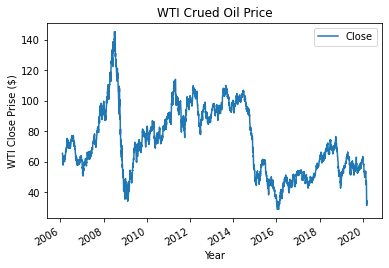

In [19]:
wti[['Close']].plot()
plt.title('WTI Crued Oil Price')
plt.xlabel('Year')
plt.ylabel('WTI Close Prise ($)')
plt.show()

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_wti = scaler.fit_transform(wti)
scaled_wti

array([[0.31575342, 0.29349315],
       [0.3135274 , 0.28655822],
       [0.29623288, 0.28981164],
       ...,
       [0.02260274,        nan],
       [0.05025685,        nan],
       [0.03844178,        nan]])

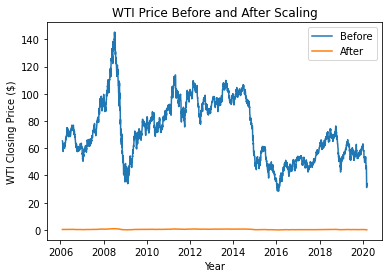

In [21]:
plt.plot(wti['Close'], label='Before')
plt.plot(wti.index,[i[0] for i in scaled_wti], label='After')
plt.legend()
plt.xlabel('Year')
plt.ylabel('WTI Closing Price ($)')
plt.title('WTI Price Before and After Scaling')
plt.show()

### Step 3: Splitting the dataset

### Create the independent data set, X
------------------
Convert the dataframe to a numpy array.

In [22]:
x = [[i[0]] for i in scaled_wti]
x = np.array(x[:-forecast_out])
x

array([[0.31575342],
       [0.3135274 ],
       [0.29623288],
       ...,
       [0.22003425],
       [0.21104452],
       [0.21395548]])

In [23]:
# Create the dependent data set y
y = [i[1] for i in scaled_wti]
y = np.array(y[:-forecast_out])
y

array([0.29349315, 0.28655822, 0.28981164, ..., 0.02260274, 0.05025685,
       0.03844178])

In [24]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=0
)

### Step 4: Modeling

#### Building SVM model

In [ ]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

In [26]:
# Testing model: score returns the coefficient of determination R^2 of the prediction.
svm_confidence = svr_rbf.score(x_test, y_test)

In [27]:
svm_confidence

0.8377796240609962

#### Building Linear Regression model

In [28]:
# create lr and train linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
lr_confidence = lr.score(x_test, y_test)

In [30]:
lr_confidence

0.8357455001237974

### Step 5: Predict using the model

In [31]:
# print the prediciton for the next 'n' days
# set x_forecast equal to last 30 rows of the original data set from close column
x_forecast = np.array([[i[0]] for i in scaled_wti][-30:])
lr_prediction = lr.predict(x_forecast)
lr_pred = scaled_wti.copy()
lr_pred[-30:,1] = lr_prediction
lr_result = pd.DataFrame(scaler.inverse_transform(lr_pred),columns=['Close', 'Prediction'])
lr_result[-31:]

,Close,Prediction
3583,53.48,32.980000
3584,53.33,54.716832
3585,52.14,53.617962
3586,51.56,53.082378
3587,50.11,51.743419
3588,49.61,51.281709
3589,50.75,52.334408
3590,50.95,52.519092
3591,50.32,51.937337
3592,49.57,51.244772


In [32]:
# Print the support vector regressor
svm_prediction = svr_rbf.predict(x_forecast)
svm_pred = scaled_wti.copy()
svm_pred[-30:,1] = svm_prediction
svm_result = pd.DataFrame(scaler.inverse_transform(svm_pred),columns=['Close', 'Prediction'])
svm_result[-31:]

,Close,Prediction
3583,53.48,32.980000
3584,53.33,52.499483
3585,52.14,51.452456
3586,51.56,50.947676
3587,50.11,49.702184
3588,49.61,49.278305
3589,50.75,50.248976
3590,50.95,50.420808
3591,50.32,49.881080
3592,49.57,49.244522


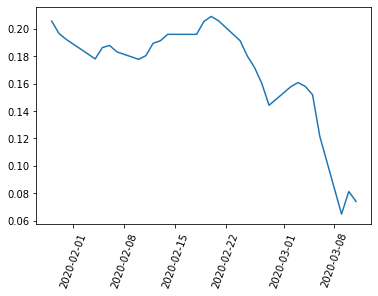

In [39]:
plt.plot(wti.index[-30:],svm_prediction)
plt.xticks(rotation=70)
plt.show()

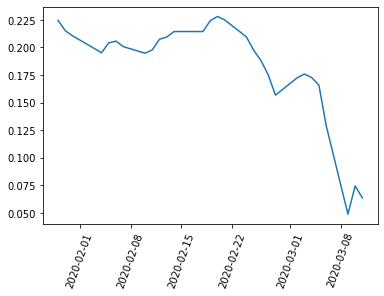

In [40]:
plt.plot(wti.index[-30:], lr_prediction)
plt.xticks(rotation=70)
plt.show()